In [1]:
import pandas as pd

In [14]:
df = pd.read_csv("D:/pro/Bank Customer Churn/Data/Bank_churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


In [4]:
print("\nMissing values in each column:", df.isnull().sum())


Missing values in each column: CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
print("\nSummary Statistics:",df.describe())


Summary Statistics:          CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.49979


Overall Churn rate of the bank: 20.37%


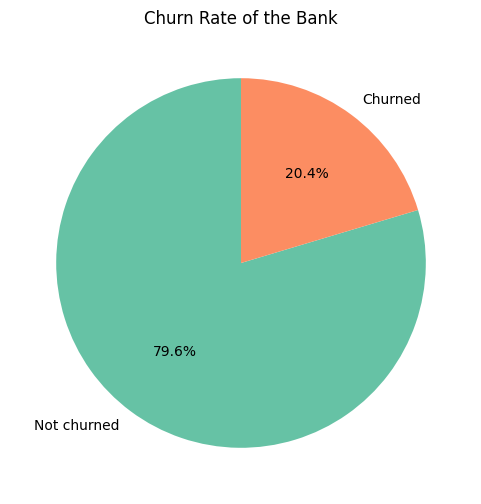

In [6]:
# Overall Churn rate of the bank
import matplotlib.pyplot as plt
import seaborn as sns

churn_rate= df['Exited'].mean()*100
print("\nOverall Churn rate of the bank: {:.2f}%".format(churn_rate))

# Pie chart for Churn rate
plt.figure(figsize=(6, 6))
df["Exited"].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not churned', 'Churned'], startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title("Churn Rate of the Bank")
plt.ylabel('')
plt.show()

Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_4288\818083257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= gender_churn.index, y=gender_churn.values, palette= ['#66c2a5', '#fc8d62'])


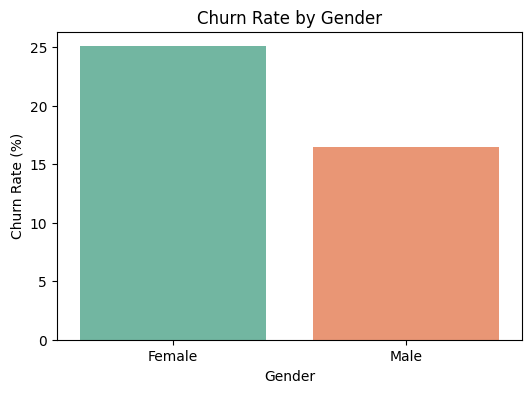

In [8]:
# Churn vary by Gender
gender_churn= df.groupby("Gender")["Exited"].mean()*100
print (gender_churn)

#Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(x= gender_churn.index, y=gender_churn.values, palette= ['#66c2a5', '#fc8d62'])
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

Age Group
18-30     7.556368
31-40    10.883571
41-50    30.786860
51-60    56.041427
61-70    35.200000
71-80    10.294118
81+       6.666667
Name: Exited, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_4288\2146497806.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby("Age Group")["Exited"].mean()*100
C:\Users\User\AppData\Local\Temp\ipykernel_4288\2146497806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_churn.index, y=age_churn.values, palette='viridis')


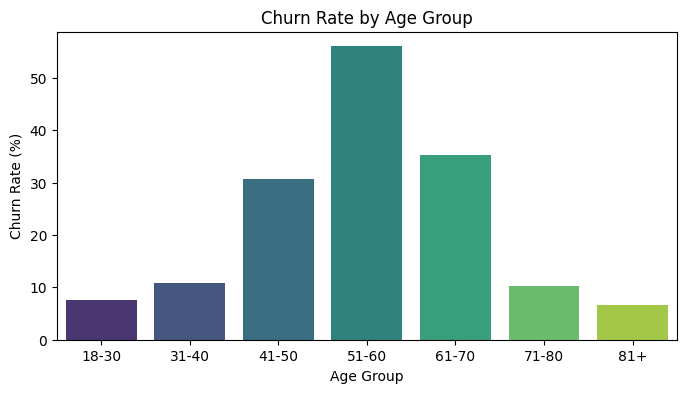

In [9]:
# Creating Age Groups

bins= [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Churn rate by Age Group
age_churn = df.groupby("Age Group")["Exited"].mean()*100
print(age_churn)

# Bar Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=age_churn.index, y=age_churn.values, palette='viridis')
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Age Group")
plt.show()

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_4288\1454821662.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_chrun.index, y=geo_chrun.values, palette='viridis')


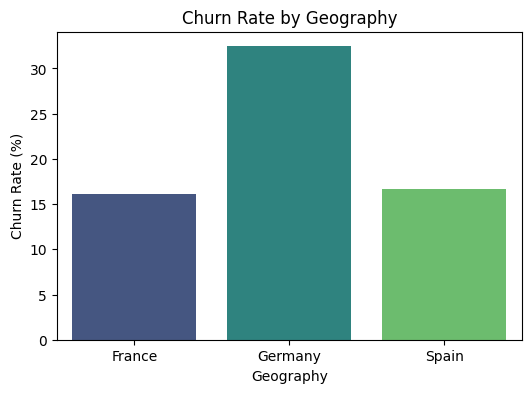

In [10]:
# Churn rate by Geography
geo_chrun = df.groupby("Geography")["Exited"].mean()*100
print(geo_chrun)

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=geo_chrun.index, y=geo_chrun.values, palette='viridis')
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Geography")
plt.show()

Creadit Score Category
Poor               NaN
Average      21.753461
Good         19.767442
Excellent          NaN
Name: Exited, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_4288\3068272092.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_churn = df.groupby("Creadit Score Category")["Exited"].mean()*100
C:\Users\User\AppData\Local\Temp\ipykernel_4288\3068272092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_churn.index, y=credit_churn.values, palette='viridis')


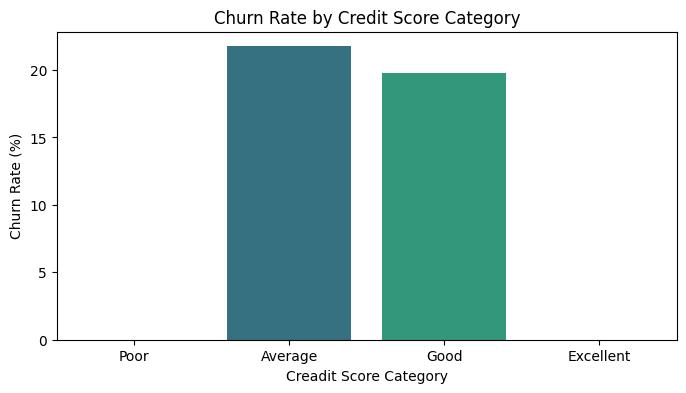

In [12]:
# Categorize Credit Score
bins = [0, 300, 600, 900, 1000]
labels = ['Poor', 'Average', 'Good', 'Excellent']
df["Creadit Score Category"] = pd.cut(df["CreditScore"], bins=bins, labels=labels, right=False)

# Churn rate by Credit Score Category
credit_churn = df.groupby("Creadit Score Category")["Exited"].mean()*100
print(credit_churn)

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=credit_churn.index, y=credit_churn.values, palette='viridis')
plt.title("Churn Rate by Credit Score Category")
plt.ylabel("Churn Rate (%)")
plt.show()  

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_4288\2130060431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products_churn.index, y=products_churn.values, palette='viridis')


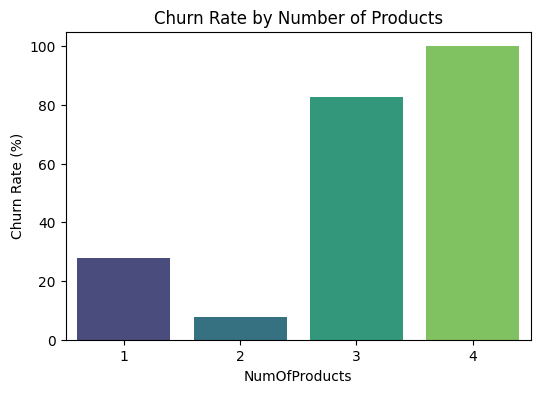

In [13]:
# How does Number of Products affect Churn Rate?

# Churn by Number of Products
products_churn = df.groupby("NumOfProducts")["Exited"].mean()*100
print(products_churn)

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=products_churn.index, y=products_churn.values, palette='viridis')
plt.title("Churn Rate by Number of Products")
plt.ylabel("Churn Rate (%)")
plt.show()